Theodore 

The purpose of this notebook is to analyze the data stored in the .npz file.

### Load the data 

In [2]:
## ------------------------ IMPORT LIB ------------------------ ##

import numpy as np
import matplotlib.pyplot as plt
from DataSet import DataSet
from PostProcessor import PostProcessor

In [3]:
## ------------------------ DEFINE COUNSTANTS AND VARIABLES ------------------------ ##

AF = 'EI'

['P_test_x', 'P_test_x_idx', 'P_test_y', 'best_pred_x', 'best_pred_x_measured', 'rand_idx', 'elapsed_time', 'emgs', 'nChan', 'sorted_isvalid', 'sorted_resp', 'sorted_respMean', 'ch2xy']


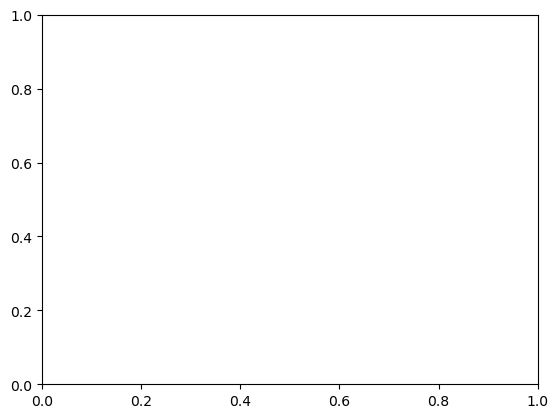

In [19]:
pp1 = PostProcessor('results/gpbo_{0}_{1}.npz'.format(AF, 'first_GPBO_validResponses'))
pp1.load_data()
pp2 = PostProcessor('results/gpbo_{0}_{1}.npz'.format(AF, 'first_GPBO_meanResponses'))
pp2.load_data()
pp3 = PostProcessor('results/gpbo_{0}_{1}.npz'.format(AF, 'first_GPBO_realisticResponses'))
pp3.load_data()
pp4 = PostProcessor('results/gpbo_{0}_{1}.npz'.format(AF, 'first_GPBO_meanResponses30rep'))
pp4.load_data()
pp5 = PostProcessor('results/gpbo_{0}_{1}.npz'.format(AF, 'first_GPBO_validResponses30rep'))
pp5.load_data()
pp6 = PostProcessor('results/gpbo_{0}_{1}.npz'.format('NEI', 'first_GPBO_validResponses30rep'))
pp6.load_data()
pp7 = PostProcessor('results/gpbo_{0}_{1}.npz'.format('NEI', 'first_GPBO_meanResponses30rep'))
pp7.load_data()
print(pp5.data.files)

### exploration and exploitation performances

In [5]:
print(pp1.best_pred_x.shape)

(6, 1, 1, 96)


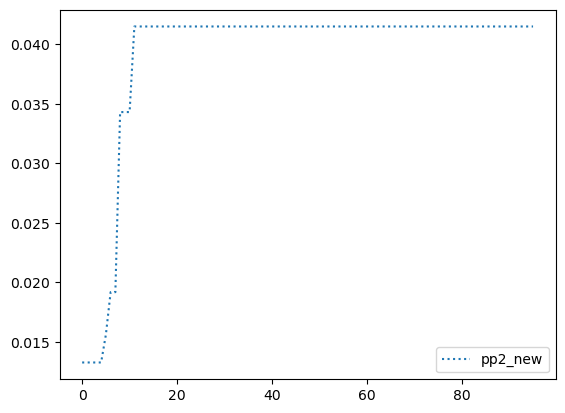

0.041497223
23
[ 0 40 40 40 40 20 11 22 42 32 32 23 23 23 23 23 23 23 23 23 23 23 23 23
 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23
 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23
 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23]
[40 40 40 40 40 30 21 21 32 32 32 23 23 23 23 23 23 23 23 23 23 23 23 23
 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23
 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23
 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23]
[40 87 18 69 37 30 21  2 32 52 33 23 13 24 22 23 23 23 23  0 92 38 65 89
 23  7 72 57 23 94 45 54 23 43 23 78 58 60 17 23 23 10 23 23 23 23 74 23
 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23
 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23]


In [6]:
# best_x_1 = pp1.best_pred_x[0, 0, 0, :]
best_x_2 = pp2.best_pred_x[0, 0, 0, :]
# best_x_new_1 = pp1.best_pred_x_measured[0, 0, 0, :]
best_x_measured_2 = pp2.best_pred_x_measured[0, 0, 0, :]

# plt.plot(pp1.ds_set['sorted_respMean'][best_x_1, 0], label='pp1', linewidth=4)
# plt.plot(pp2.ds_set['sorted_respMean'][best_x_2, 0], label='pp2', linestyle='--')
# plt.plot(pp1.ds_set['sorted_respMean'][best_x_measured_1, 0], label='pp1_new')
plt.plot(pp2.ds_set['sorted_respMean'][best_x_measured_2, 0], label='pp2_new', linestyle=':')
plt.legend()
plt.show()

print(np.max(pp1.ds_set['sorted_respMean'][:, 0]))
print(np.argmax(pp1.ds_set['sorted_respMean'][:, 0]))

print(best_x_2)
print(best_x_measured_2)
print(pp2.P_test_x_idx[0, 0, 0, :])


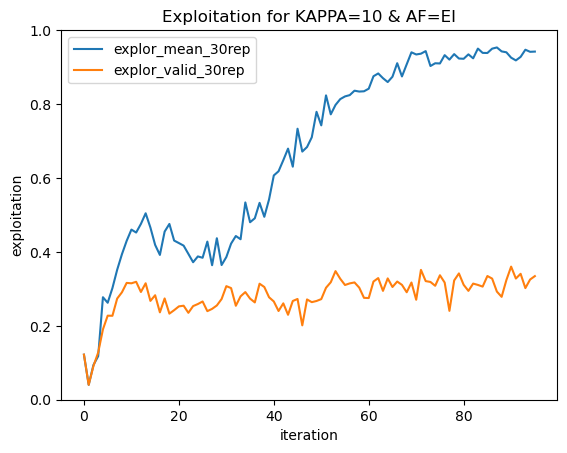

In [21]:
# plt.plot(pp2.exploitation(), label='exploit_mean')
# plt.plot(pp1.exploitation(), label='exploit_valid')
# plt.plot(pp3.exploitation(), label='exploit_realistic', linestyle=':')
plt.plot(pp4.exploitation(), label='explor_EI_mean_30rep')
plt.plot(pp5.exploitation(), label='explor_EI_valid_30rep')
plt.plot(pp6.exploitation(), label='explor_NEI_valid_30rep')
plt.plot(pp7.exploitation(), label='explor_NEI_mean_30rep')
plt.legend()
plt.title("Exploitation for KAPPA=10 & AF=EI")
plt.xlabel("iteration")
plt.ylabel("exploitation")
plt.ylim(0, 1)
plt.show()

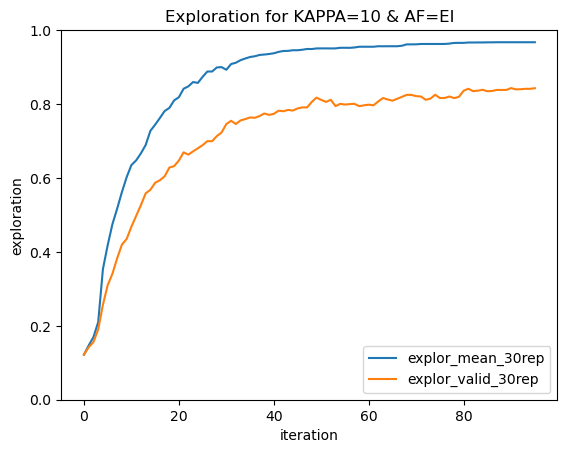

In [20]:
# plt.plot(pp2.exploration(), label='explor_mean')
# plt.plot(pp1.exploration(), label='explor_valid')
# plt.plot(pp3.exploration(), label='explor_realistic', linestyle=':')
plt.plot(pp4.exploration(), label='explor_EI_mean_30rep')
plt.plot(pp5.exploration(), label='explor_EI_valid_30rep')
plt.plot(pp6.exploration(), label='explor_NEI_valid_30rep')
plt.plot(pp7.exploration(), label='explor_NEI_mean_30rep')
plt.legend()
plt.title("Exploration for KAPPA=10")
plt.xlabel("iteration")
plt.ylabel("exploration")
plt.ylim(0, 1)
plt.show()

In [9]:
print(pp4.best_pred_x.shape)
print(pp2.best_pred_x.shape)

(6, 30, 1, 96)
(6, 1, 1, 96)


In [10]:
REP_idx = [3]
print(REP_idx)
REP_idx = list(range(6))
print(REP_idx)

[3]
[0, 1, 2, 3, 4, 5]


In [11]:
for i in range(30):
    if pp4.exploration([2],[i])[-1]<1:
        print(i)

1
7
11
